## Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## About Dataset

Data Set Information:

The parameters which we used for collecting the dataset is referred from the paper 'The discovery of expertsâ€™ decision rules from qualitative bankruptcy data using genetic algorithms' by Myoung-Jong Kim*, Ingoo Han.


Attribute Information:

Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)

1. Industrial Risk: {P,A,N}
2. Management Risk: {P,A,N}
3. Financial Flexibility: {P,A,N}
4. Credibility: {P,A,N}
5. Competitiveness: {P,A,N}
6. Operating Risk: {P,A,N}
7. Class: {B,NB}

Link to dataset: https://archive.ics.uci.edu/ml/datasets/qualitative_bankruptcy

### Reading the dataset

In [2]:
dataset = pd.read_csv('Qualitative_Bankruptcy.data.txt', names = ['Industrial Risk',
                                                                  'Management Risk',
                                                                  'Financial Flexibility',
                                                                  'Credibility',
                                                                  'Competitiveness',
                                                                  'Operating Risk',
                                                                  'Class'])

In [3]:
dataset.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [4]:
dataset.tail()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B
249,P,N,N,N,A,A,B


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


## Preprocessing the dataset

### Label Encoding:
For Attributes
- P - 0
- A - 1
- N - 2

For Class
- B - 0
- NB - 1

In [6]:
label_encoding_dict = {'P':0, 'A':1, 'N':2, 'B':0, 'NB':1}
dataset.replace(label_encoding_dict, inplace = True)

In [7]:
dataset.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,0,0,1,1,1,0,1
1,2,2,1,1,1,2,1
2,1,1,1,1,1,1,1
3,0,0,0,0,0,0,1
4,2,2,0,0,0,2,1


In [8]:
dataset.tail()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
245,2,2,1,2,2,2,0
246,0,2,2,2,2,2,0
247,1,2,2,2,2,2,0
248,2,2,2,2,2,2,0
249,0,2,2,2,1,1,0


In [9]:
dataset['Class'].value_counts()

1    143
0    107
Name: Class, dtype: int64

**Checking the dataset and for null values**

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Industrial Risk        250 non-null    int64
 1   Management Risk        250 non-null    int64
 2   Financial Flexibility  250 non-null    int64
 3   Credibility            250 non-null    int64
 4   Competitiveness        250 non-null    int64
 5   Operating Risk         250 non-null    int64
 6   Class                  250 non-null    int64
dtypes: int64(7)
memory usage: 13.8 KB


In [11]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [12]:
dataset.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,2,1,2,2,0
1,0,0,1,0,1,0,1
2,2,1,0,0,0,2,1
3,1,1,1,1,1,1,1
4,1,1,2,2,2,2,0


### Dataframe to numpy for model training

In [13]:
X = dataset.iloc[:, :-1]
y = dataset['Class']

In [14]:
X.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,2,1,2,2
1,0,0,1,0,1,0
2,2,1,0,0,0,2
3,1,1,1,1,1,1
4,1,1,2,2,2,2


In [15]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Class, dtype: int64

In [16]:
X = X.to_numpy()
y = y.to_numpy()

In [17]:
X

array([[2, 2, 2, 1, 2, 2],
       [0, 0, 1, 0, 1, 0],
       [2, 1, 0, 0, 0, 2],
       ...,
       [2, 0, 1, 0, 1, 0],
       [2, 0, 0, 0, 0, 2],
       [1, 1, 0, 0, 1, 1]], dtype=int64)

In [18]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

**Normalizing the dataset**

In [19]:
X = X / np.linalg.norm(X)

In [20]:
X

array([[0.03672353, 0.03672353, 0.03672353, 0.01836177, 0.03672353,
        0.03672353],
       [0.        , 0.        , 0.01836177, 0.        , 0.01836177,
        0.        ],
       [0.03672353, 0.01836177, 0.        , 0.        , 0.        ,
        0.03672353],
       ...,
       [0.03672353, 0.        , 0.01836177, 0.        , 0.01836177,
        0.        ],
       [0.03672353, 0.        , 0.        , 0.        , 0.        ,
        0.03672353],
       [0.01836177, 0.01836177, 0.        , 0.        , 0.01836177,
        0.01836177]])

In [21]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

## MLP - BP and SDGM

In [22]:
class MLP_classifier(object):
    def __init__(self):
        # parameters
        self.inputSize = 6 # number of input attributes or features
        self.hiddenSize_1 = 7
        self.hiddenSize_2 = 5
        self.outputSize = 2
        
        # weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize_1) # (6x7) weight matrix from input to hidden layer 1
        self.W2 = np.random.randn(self.hiddenSize_1, self.hiddenSize_2) # (7x5) weight matrix from hidden layer 1 to hidden layer 2
        self.W3 = np.random.randn(self.hiddenSize_2, self.outputSize) # (5x2) weight matrix from hidden layer2 to output layer
        
        # old values
        self.delta_OW1 = np.zeros((self.inputSize, self.hiddenSize_1))
        self.delta_OW2 = np.zeros((self.hiddenSize_1, self.hiddenSize_2))
        self.delta_OW3 = np.zeros((self.hiddenSize_2, self.outputSize))
        
        # momentum
        self.alpha = 0.9
        # Learning rate
        self.eta1 = 0.1
        self.eta2 = 0.1
        self.eta3 = 0.1
        
        
    def feedForward(self, X):
        #forward propogation through the network
        self.z = np.dot(X, self.W1) #dot product of X (input) and first set of weights (6x7)
        self.z2 = self.sigmoid(self.z) #activation function
        
        self.z3 = np.dot(self.z2, self.W2) #dot product of hidden layer (z2) and second set of weights (7x5)
        self.z4 = self.sigmoid(self.z3) #activation function
        
        self.z5 = np.dot(self.z4, self.W3) #dot product of hidden layer (z4) and third set of weights (5x2)
        
        output = self.sigmoid(self.z5)
        final_output = []
        for op in output:
            final_output.append(np.argmax(op)) # index of max value is our class
        final_output = np.array(final_output)
        final_output = final_output.reshape([final_output.shape[0],1]) # as y is of shape (number of instances, 1) we need same for the output
        return final_output
        
    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s) # derivation of sigmoid function
        return 1/(1 + np.exp(-s))
    
    def backward(self, X, y, output):
        # backward propogate through the network
        
        self.output_error = y - output # error in output
        self.output_delta = self.output_error * self.sigmoid(output, deriv=True)
        
        self.z4_error = self.z4.T.dot(self.output_delta) #z4 error: how much our hidden layer weights contribute to output error
        self.z4_delta = self.z4_error.dot(self.sigmoid(self.z4, deriv=True)) #applying derivative of sigmoid to z4 error
        
        self.z2_error = self.z2.T.dot(self.output_delta) #z2 error: how much our hidden layer weights contribute to output error
        self.z2_delta = self.z2_error.dot(self.sigmoid(self.z2, deriv=True)) #applying derivative of sigmoid to z2 error
        
        # SDGM
        self.delta_W1 = self.eta1 * self.z2_delta.dot(self.z2.T)
        self.delta_W2 = self.eta2 * self.z4_delta.dot(self.z4.T)
        self.delta_W3 = self.eta3 * self.output_delta.dot(output)
        
        self.delta_W1.resize(self.W1.shape)
        self.delta_W2.resize(self.W2.shape)
        self.delta_W3.resize(self.W3.shape)
        
        # Updating the weights
        W1_temp = self.W1 + self.alpha * self.delta_OW1 + self.delta_W1
        W2_temp = self.W2 + self.alpha * self.delta_OW2 + self.delta_W2
        W3_temp = self.W3 + self.alpha * self.delta_OW3 + self.delta_W3
        
        self.delta_OW1 = self.delta_W1
        self.delta_OW2 = self.delta_W2
        self.delta_OW3 = self.delta_W3
        
        self.W1 = W1_temp
        self.W2 = W2_temp
        self.W3 = W3_temp
        
    def train(self, X, y):
        # Feed forward
        output = self.feedForward(X)
        
        # Calculating the training accuracy for each iteration
        count = 0
        for i in range(y.shape[0]):
            if y[i] == output[i]:
                count += 1
        accuracy = count/y.shape[0]
        
        # Back Propagation with SDGM
        self.backward(X, y, output)
        return accuracy

In [23]:
NN = MLP_classifier() # Class object

## Training the model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y) # shuffling due to imbalance data
#split ratio is 80:20
print('Training set info:',X_train.shape,y_train.shape)
print('Testing set info:',X_test.shape,y_test.shape)

Training set info: (200, 6) (200,)
Testing set info: (50, 6) (50,)


In [25]:
df = pd.DataFrame(y_train)
df.value_counts()

1    114
0     86
dtype: int64

In [26]:
num_Epoch = 1000 # number of epochs
epoch = 1 # counter variable

training_accuracy = [] # saving MSE for each epoch
while epoch <= num_Epoch:
    # Shuffling the dataset before each epoch
    p = np.random.permutation(X_train.shape[0])
    X = X_train[p]
    y = y_train[p]
    itr_accuracy = []
    for i in range(1,X.shape[0]): # number of iterations in each epoch will be equal to number of samples
        accuracy = NN.train(X[:i], y[:i]) # input in batches
        itr_accuracy.append(accuracy)
    training_accuracy.append(np.average(itr_accuracy)) # accuracy for each epoch
    #print(epoch, accuracy)
    if epoch % 100 == 0: # after every 100 epochs, decreasing the learning and making momentum more closer to one
        print('Completed', epoch, 'epochs')
        NN.eta1 = NN.eta1/10
        NN.eta2 = NN.eta2/10
        NN.eta3 = NN.eta3/10
        NN.alpha = 0.9 + NN.alpha/10
        print('Accuracy:', training_accuracy[-1])
    epoch += 1
print('======================')
print("Training Accuracy:",np.average(training_accuracy))

Completed 100 epochs
Accuracy: 0.46114639427906257
Completed 200 epochs
Accuracy: 0.46089078312824566
Completed 300 epochs
Accuracy: 0.4006044115701668
Completed 400 epochs
Accuracy: 0.4057411418009397
Completed 500 epochs
Accuracy: 0.5054657514436207
Completed 600 epochs
Accuracy: 0.3562320176377162
Completed 700 epochs
Accuracy: 0.45277318523780136
Completed 800 epochs
Accuracy: 0.3892727849866481
Completed 900 epochs
Accuracy: 0.3974531808377135
Completed 1000 epochs
Accuracy: 0.4128968122846298
Training Accuracy: 0.42903676349797293


## Learning Curve

<Figure size 720x576 with 0 Axes>

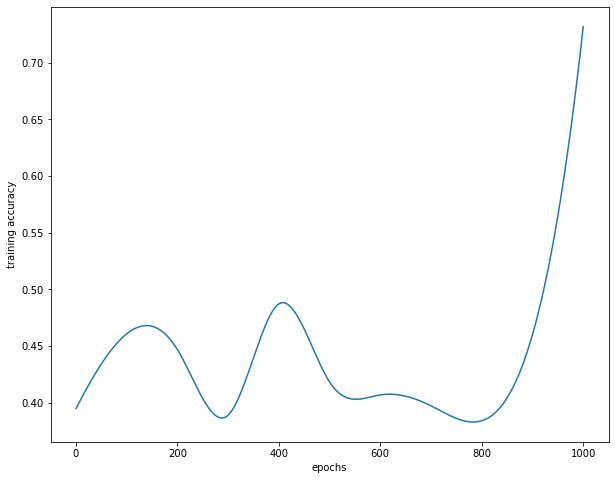

In [39]:
plt.figure(figsize=(10,8))
X = [i for i in range(num_Epoch) if i % 100 == 0]
Y = [i for counter,i in enumerate(training_accuracy) if counter % 100 == 0]



from scipy.interpolate import make_interp_spline
X_Y_Spline = make_interp_spline(X, Y)
plt.figure(figsize=(10,8))
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(0, num_Epoch, 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.xlabel("epochs")
plt.ylabel("training accuracy")
plt.show()

In [43]:
predicted_output = NN.feedForward(X_test)
count = 0
for i in range(y_test.shape[0]):
    if y[i] == predicted_output[i]:
        count += 1

accuracy = count/y.shape[0]
print('Training Accuracy', max(training_accuracy))
print('Test Accuracy:', accuracy)

Training Accuracy 0.76
Test Accuracy: 0.73
